# IPL Win Prediction

# 1. Loading Datasets 

In [1]:
#importing the required packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import ttest_1samp
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Reading the dataset1
df2=pd.read_csv("C:/Users/mohit/Downloads/IPL Ball-by-Ball 2008-2020.csv") 


In [3]:
df2.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
#reading the dataset2
df1=pd.read_csv("C:/Users/mohit/Downloads/IPL Matches 2008-2020.csv")

In [5]:
df1.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [6]:
#merging the datasets 
data=df1.merge(df2,on='id')
data

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [7]:
#display information about a dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                193468 non-null  int64  
 1   city              190329 non-null  object 
 2   date              193468 non-null  object 
 3   player_of_match   193096 non-null  object 
 4   venue             193468 non-null  object 
 5   neutral_venue     193468 non-null  int64  
 6   team1             193468 non-null  object 
 7   team2             193468 non-null  object 
 8   toss_winner       193468 non-null  object 
 9   toss_decision     193468 non-null  object 
 10  winner            193096 non-null  object 
 11  result            193096 non-null  object 
 12  result_margin     189871 non-null  float64
 13  eliminator        193096 non-null  object 
 14  method            3208 non-null    object 
 15  umpire1           193468 non-null  object 
 16  umpire2           19

In [8]:
# descriptive statistics of a dataset
data.describe()

,id,neutral_venue,result_margin,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,189871.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,0.094827,17.340895,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.292977,21.886397,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,0.000000,6.000000,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,0.000000,8.000000,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,0.000000,20.000000,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,1.000000,146.000000,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [9]:
#returns number of rows and columns
data.shape

(193468, 34)

# 2. EDA

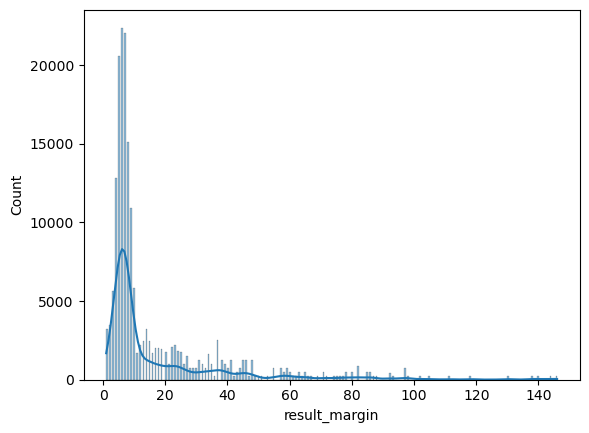

In [10]:
# Visualize the distribution of the numerical variables
sns.histplot(data["result_margin"], kde=True)
plt.show()

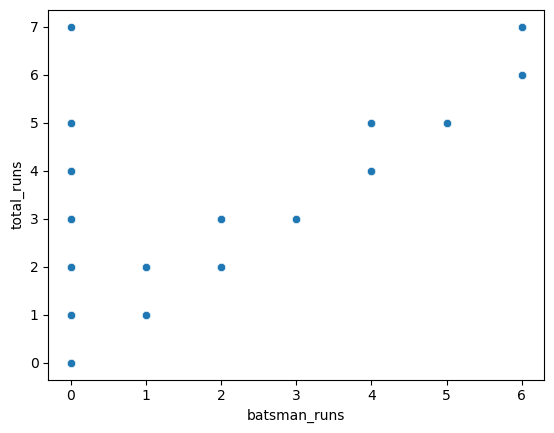

In [11]:
# Visualize the relationship between the numerical variables
sns.scatterplot(x="batsman_runs", y="total_runs", data=data)
plt.show()

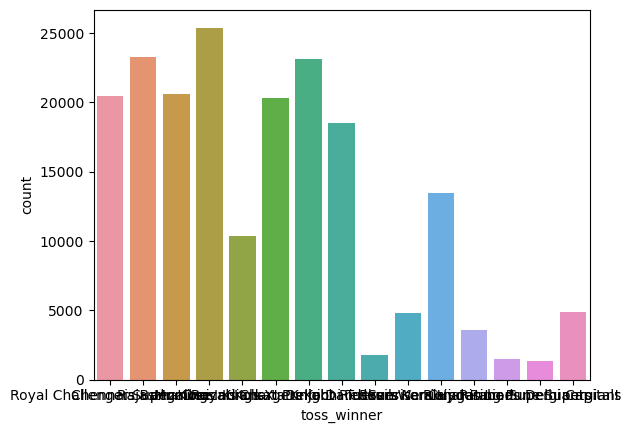

In [12]:
# Visualize the frequency distribution of the categorical variables
sns.countplot(x="toss_winner", data=data)
plt.show()

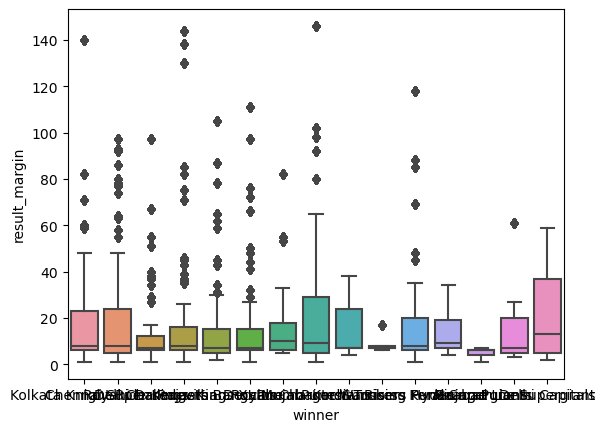

In [13]:
# Visualize the relationship between a numerical variable and a categorical variable
sns.boxplot(x="winner", y="result_margin", data=data)
plt.show()

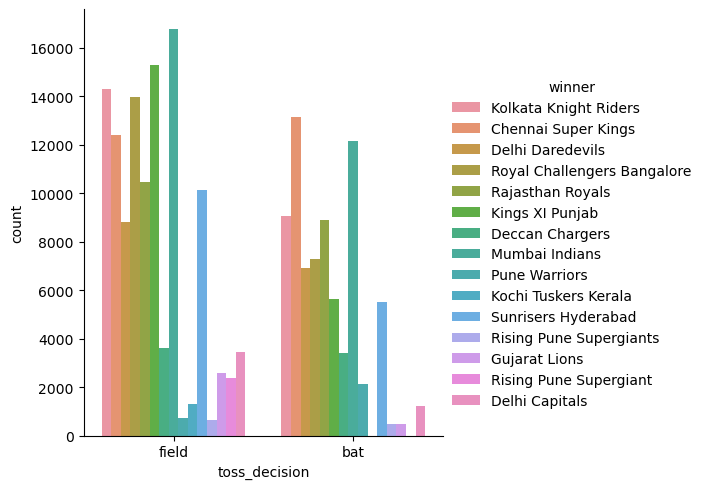

In [14]:
# Visualize the relationship between two categorical variables
sns.catplot(x="toss_decision", hue="winner", kind="count", data=data)
plt.show()

Text(0.5, 1.0, 'Number of times a team won the match')

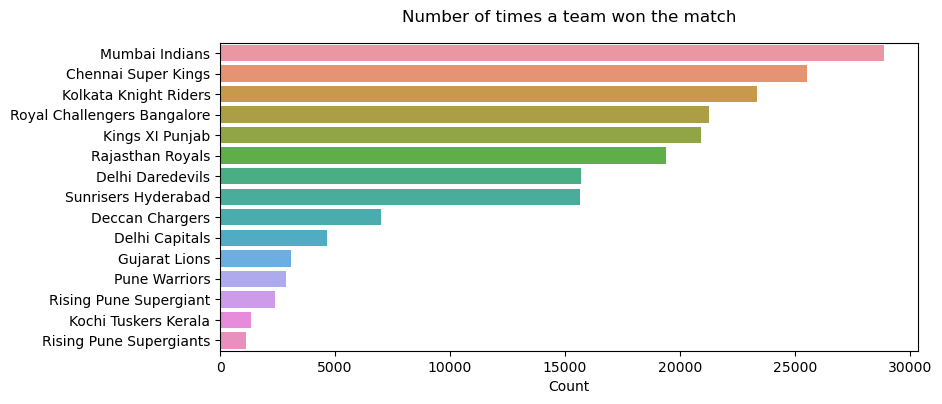

In [15]:
plt.figure(figsize=(9,4))
sns.barplot(x=data['winner'].value_counts(),y=data['winner'].value_counts().keys())
plt.xlabel('Count')
plt.title('Number of times a team won the match',pad=15)

In [16]:
data['winner'].value_counts()

Mumbai Indians                 28885
Chennai Super Kings            25531
Kolkata Knight Riders          23358
Royal Challengers Bangalore    21240
Kings XI Punjab                20904
Rajasthan Royals               19370
Delhi Daredevils               15709
Sunrisers Hyderabad            15667
Deccan Chargers                 7013
Delhi Capitals                  4663
Gujarat Lions                   3063
Pune Warriors                   2883
Rising Pune Supergiant          2383
Kochi Tuskers Kerala            1322
Rising Pune Supergiants         1105
Name: winner, dtype: int64

In [17]:
data['player_of_match'].value_counts()

AB de Villiers    5663
CH Gayle          5186
RG Sharma         4412
MS Dhoni          4130
DA Warner         4076
                  ... 
SB Wagh            207
BA Bhatt           204
DJG Sammy          203
RP Singh           199
DL Vettori         108
Name: player_of_match, Length: 233, dtype: int64

Text(0.5, 0, 'Player of Match')

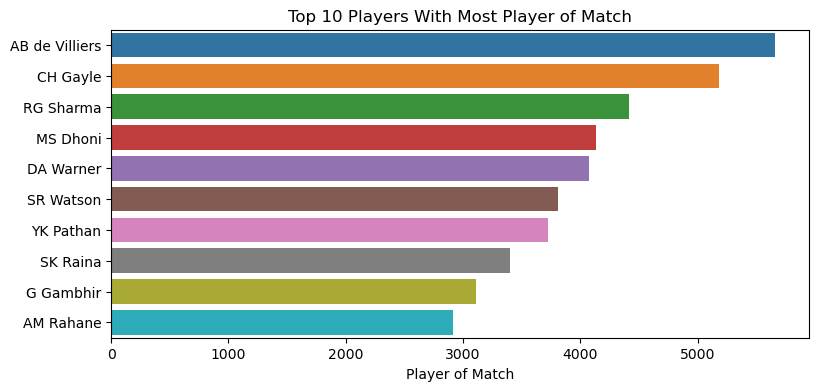

In [18]:
plt.figure(figsize=(9,4))
sns.barplot(y=data['player_of_match'].value_counts().keys()[0:10],x=data['player_of_match'].value_counts()[0:10])
plt.title('Top 10 Players With Most Player of Match')
plt.xlabel('Player of Match')

In [19]:
data[['winner','eliminator']] [data['eliminator']=='Y'].value_counts()

winner                       eliminator
Kings XI Punjab              Y             742
Rajasthan Royals             Y             506
Delhi Capitals               Y             497
Mumbai Indians               Y             494
Royal Challengers Bangalore  Y             494
Sunrisers Hyderabad          Y             248
Kolkata Knight Riders        Y             244
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Rajasthan Royals'),
  Text(1, 0, 'Kings XI Punjab'),
  Text(2, 0, 'Sunrisers Hyderabad'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Mumbai Indians'),
  Text(5, 0, 'Delhi Capitals'),
  Text(6, 0, 'Kolkata Knight Riders')])

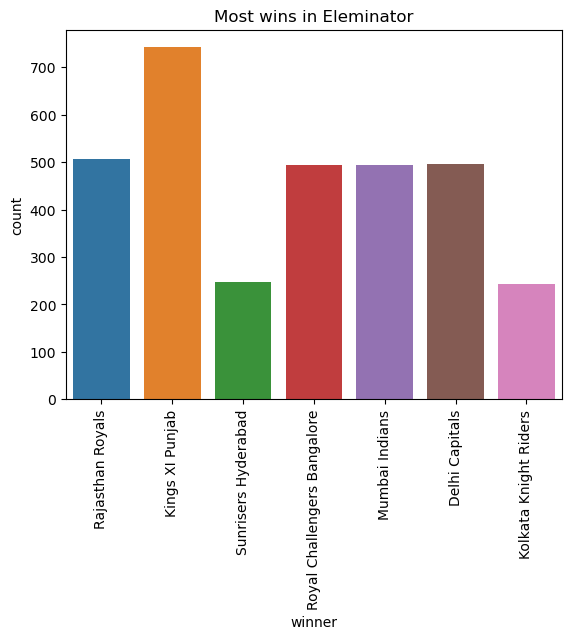

In [20]:
sns.countplot(data['winner'][data['eliminator']=='Y'])
plt.title('Most wins in Eleminator')
plt.xticks(rotation=90)

In [21]:
played=list(data['team1'])+list (data['team2'])

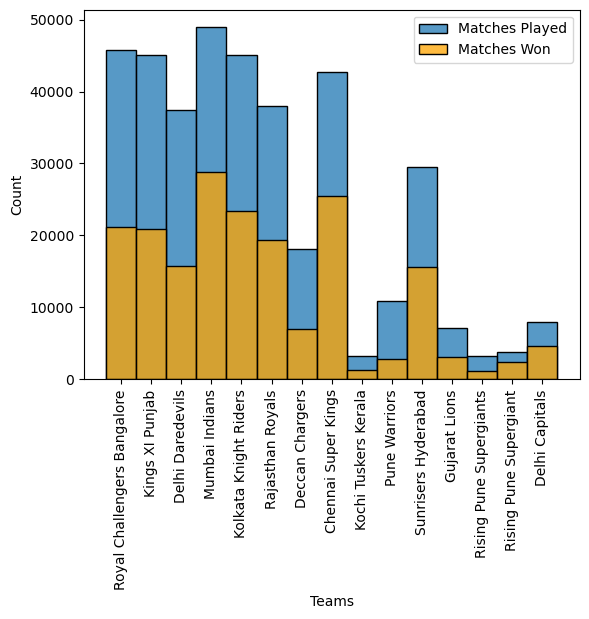

In [22]:
#comparing the matches played and matches won by each team
sns.histplot(played)
sns.histplot(data['winner'], color='orange')
plt.xticks(rotation=90)
plt.legend(['Matches Played','Matches Won'])
plt.xlabel('Teams');

In [23]:
# Calculate average runs per over for each team
runs_per_over = data.groupby('batting_team')['total_runs'].sum() / data.groupby('batting_team')['over'].nunique()

# Calculate average wickets lost per match for each team
wickets_per_match = data.groupby('batting_team')['player_dismissed'].count() / data[data['inning'] == 1].groupby('batting_team')['id'].nunique()

# Calculate average runs conceded per over for each team
runs_conceded_per_over = data.groupby('bowling_team')['total_runs'].sum() / data.groupby('bowling_team')['over'].nunique()

# Calculate average wickets taken per match for each team
wickets_taken_per_match = data.groupby('bowling_team')['player_dismissed'].count() / data[data['inning'] == 2].groupby('bowling_team')['id'].nunique()

# Print results
print('Average runs per over:\n', runs_per_over)
print('\nAverage wickets lost per match:\n', wickets_per_match)
print('\nAverage runs conceded per over:\n', runs_conceded_per_over)
print('\nAverage wickets taken per match:\n', wickets_taken_per_match)



Average runs per over:
 batting_team
Chennai Super Kings            1418.15
Deccan Chargers                 573.15
Delhi Capitals                  264.80
Delhi Daredevils               1214.25
Gujarat Lions                   242.80
Kings XI Punjab                1500.85
Kochi Tuskers Kerala             95.05
Kolkata Knight Riders          1469.15
Mumbai Indians                 1614.30
Pune Warriors                   317.90
Rajasthan Royals               1225.35
Rising Pune Supergiant          123.50
Rising Pune Supergiants         103.15
Royal Challengers Bangalore    1510.70
Sunrisers Hyderabad             966.60
dtype: float64

Average wickets lost per match:
 batting_team
Chennai Super Kings             9.870968
Deccan Chargers                11.255814
Delhi Capitals                 12.470588
Delhi Daredevils               13.194444
Gujarat Lions                  13.428571
Kings XI Punjab                11.865979
Kochi Tuskers Kerala           12.285714
Kolkata Knight Riders        

In [24]:
# Average runs per over for each team:
# Group data by batting team and calculate mean runs per over
runs_per_over = data.groupby('batting_team')['total_runs'].sum() / (data.groupby('batting_team')['ball'].count() / 6)

print(runs_per_over)

batting_team
Chennai Super Kings            7.931857
Deccan Chargers                7.613239
Delhi Capitals                 7.928144
Delhi Daredevils               7.758786
Gujarat Lions                  8.188870
Kings XI Punjab                7.961365
Kochi Tuskers Kerala           7.209861
Kolkata Knight Riders          7.816707
Mumbai Indians                 7.917763
Pune Warriors                  7.008635
Rajasthan Royals               7.757835
Rising Pune Supergiant         7.800000
Rising Pune Supergiants        7.834177
Royal Challengers Bangalore    7.983969
Sunrisers Hyderabad            7.823553
dtype: float64


In [25]:
#Number of wickets per team per season:
# Extract season from date column
data['season'] = pd.DatetimeIndex(data['date']).year

# Group data by bowling team and season and calculate mean wickets taken
wickets_per_team_season = data.groupby(['bowling_team', 'season'])['player_dismissed'].count().reset_index()
wickets_per_team_season = wickets_per_team_season.rename(columns={'player_dismissed': 'wickets_taken'})

print(wickets_per_team_season)

            bowling_team  season  wickets_taken
0    Chennai Super Kings    2008             93
1    Chennai Super Kings    2009             91
2    Chennai Super Kings    2010            102
3    Chennai Super Kings    2011             91
4    Chennai Super Kings    2012            108
..                   ...     ...            ...
103  Sunrisers Hyderabad    2016             98
104  Sunrisers Hyderabad    2017             96
105  Sunrisers Hyderabad    2018            105
106  Sunrisers Hyderabad    2019             89
107  Sunrisers Hyderabad    2020             99

[108 rows x 3 columns]


In [26]:
#Strike rate for top 10 batsmen with most runs:
# Group data by batsman and calculate total runs and balls faced
batsman_stats = data.groupby('batsman').agg({'total_runs': 'sum', 'ball': 'count'})

# Calculate strike rate and sort by descending order of total runs
batsman_stats['strike_rate'] = batsman_stats['total_runs'] / batsman_stats['ball'] * 100
batsman_stats = batsman_stats.sort_values('total_runs', ascending=False)

# Select top 10 batsmen by total runs
top_10_batsmen = batsman_stats.head(10)

print(top_10_batsmen[['total_runs', 'strike_rate']])

                total_runs  strike_rate
batsman                                
V Kohli               6081   131.937514
SK Raina              5604   138.678545
DA Warner             5522   144.592825
S Dhawan              5452   129.562738
RG Sharma             5394   131.947162
CH Gayle              5103   152.692998
AB de Villiers        5016   153.676471
RV Uthappa            4878   133.351558
MS Dhoni              4855   138.992270
G Gambhir             4479   127.099886


# 3. Hypothesis Testing

Null hypothesis: There is no significant difference in the proportion of matches won by teams that win the toss versus teams that lose the toss.

Alternative hypothesis: The proportion of matches won by teams that win the toss is significantly different from the proportion of matches won by teams that lose the toss.

In [27]:
# Create contingency table of toss result vs. match result
cont_table = pd.crosstab(data['toss_winner'], data['winner'])

# Drop rows where the toss winner did not win the match
cont_table = cont_table[cont_table.index == cont_table.columns]

# Extract values for toss winner wins and losses
toss_wins = cont_table.values.diagonal()
toss_losses = cont_table.values.sum(axis=0) - toss_wins

# Conduct chi-squared test
chi2, pval, dof, expected = chi2_contingency([toss_wins, toss_losses])

# Print results
print('Chi-squared test statistic: {}'.format(chi2))
print('P-value: {}'.format(pval))
if pval < 0.05:
    print('Reject null hypothesis: Proportions are significantly different')
else:
    print('Fail to reject null hypothesis: Proportions are not significantly different')


Chi-squared test statistic: 4374.716696176204
P-value: 0.0
Reject null hypothesis: Proportions are significantly different


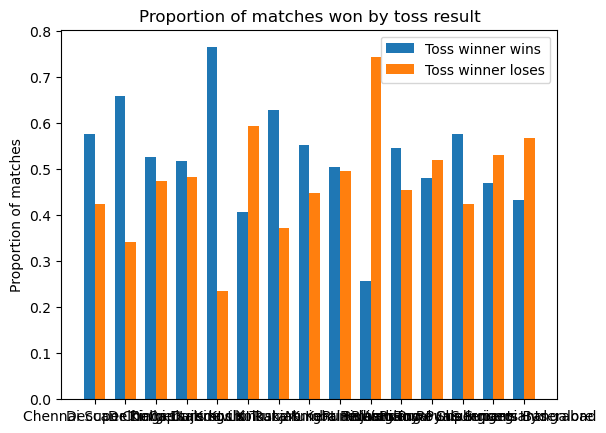

In [28]:
# Create contingency table of toss result vs. match result
cont_table = pd.crosstab(data['toss_winner'], data['winner'])

# Drop rows where the toss winner did not win the match
cont_table = cont_table[cont_table.index == cont_table.columns]

# Extract values for toss winner wins and losses
toss_wins = cont_table.values.diagonal()
toss_losses = cont_table.values.sum(axis=0) - toss_wins

# Calculate proportions
total_matches = toss_wins + toss_losses
toss_win_prop = toss_wins / total_matches
toss_loss_prop = toss_losses / total_matches

# Create bar chart
labels = cont_table.columns
x = list(range(len(labels)))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([i - width/2 for i in x], toss_win_prop, width, label='Toss winner wins')
rects2 = ax.bar([i + width/2 for i in x], toss_loss_prop, width, label='Toss winner loses')

# Add labels and legend
ax.set_ylabel('Proportion of matches')
ax.set_title('Proportion of matches won by toss result')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# 4. Data Preprocessing

In [29]:
data.drop(['date', 'city','player_of_match','neutral_venue','toss_winner','toss_decision','method', 'umpire1', 'umpire2','batsman', 'non_striker', 'bowler',
        'batsman_runs','extra_runs','result', 'non_boundary','eliminator','result_margin','dismissal_kind', 'player_dismissed', 'fielder', 'extras_type'], axis='columns',inplace=True)
data.head()

,id,venue,team1,team2,winner,inning,over,ball,total_runs,is_wicket,batting_team,bowling_team,season
0,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,6,5,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,6,6,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,7,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,7,2,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,7,3,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008


In [30]:
data1=data.groupby(['id','inning']).sum()['total_runs']
data1

id       inning
335982   1         222
         2          82
335983   1         240
         2         207
335984   1         129
                  ... 
1237178  2         132
1237180  1         189
         2         172
1237181  1         156
         2         157
Name: total_runs, Length: 1630, dtype: int64

In [31]:
data1=data1.reset_index()
data1

,id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1625,1237178,2,132
1626,1237180,1,189
1627,1237180,2,172
1628,1237181,1,156


In [32]:
data1=data1[data1.inning==1]
data1

,id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1620,1216547,1,201
1622,1237177,1,200
1624,1237178,1,131
1626,1237180,1,189


In [33]:
data1['Target']=data1['total_runs']+1
data1.drop(['total_runs'],axis='columns',inplace=True)
data1

C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\3495984835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Target']=data1['total_runs']+1
C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\3495984835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(['total_runs'],axis='columns',inplace=True)


,id,inning,Target
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111
...,...,...,...
1620,1216547,1,202
1622,1237177,1,201
1624,1237178,1,132
1626,1237180,1,190


In [34]:
data=data.merge(data1,on='id')
data

,id,venue,team1,team2,winner,inning_x,over,ball,total_runs,is_wicket,batting_team,bowling_team,season,inning_y,Target
0,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,6,5,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008,1,223
1,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,6,6,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008,1,223
2,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,7,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008,1,223
3,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,7,2,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008,1,223
4,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,7,3,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008,1,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,1,12,5,0,0,Delhi Capitals,Mumbai Indians,2020,1,157
193464,1237181,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,1,12,6,1,0,Delhi Capitals,Mumbai Indians,2020,1,157
193465,1237181,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,1,13,1,1,0,Delhi Capitals,Mumbai Indians,2020,1,157
193466,1237181,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,1,13,2,1,0,Delhi Capitals,Mumbai Indians,2020,1,157


In [35]:
data=data[(data.inning_x==2)]
data

,id,venue,team1,team2,winner,inning_x,over,ball,total_runs,is_wicket,batting_team,bowling_team,season,inning_y,Target
121,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,1,223
122,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,1,223
123,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,1,223
124,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,1,223
125,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,1,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193372,1237181,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,2,17,6,1,0,Mumbai Indians,Delhi Capitals,2020,1,157
193373,1237181,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,2,18,1,1,0,Mumbai Indians,Delhi Capitals,2020,1,157
193374,1237181,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,2,18,2,1,0,Mumbai Indians,Delhi Capitals,2020,1,157
193375,1237181,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,2,18,3,0,1,Mumbai Indians,Delhi Capitals,2020,1,157


In [36]:
data.drop(['inning_x','inning_y','team1','team2'],axis='columns',inplace=True)
data.rename(columns={"total_runs":"Run_on_this_ball"},inplace=True)

C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\3312219320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['inning_x','inning_y','team1','team2'],axis='columns',inplace=True)
C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\3312219320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"total_runs":"Run_on_this_ball"},inplace=True)


In [37]:
data

,id,venue,winner,over,ball,Run_on_this_ball,is_wicket,batting_team,bowling_team,season,Target
121,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223
122,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223
123,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223
124,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223
125,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223
...,...,...,...,...,...,...,...,...,...,...,...
193372,1237181,Dubai International Cricket Stadium,Mumbai Indians,17,6,1,0,Mumbai Indians,Delhi Capitals,2020,157
193373,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,1,1,0,Mumbai Indians,Delhi Capitals,2020,157
193374,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,2,1,0,Mumbai Indians,Delhi Capitals,2020,157
193375,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,3,0,1,Mumbai Indians,Delhi Capitals,2020,157


In [38]:
data.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [39]:
data.batting_team=data.batting_team.str.replace('Delhi Daredevils','Delhi Capitals')
data.bowling_team=data.bowling_team.str.replace('Delhi Daredevils','Delhi Capitals')
data.batting_team=data.batting_team.str.replace('Deccan Chargers','Sunrisers Hyderabad')
data.bowling_team=data.bowling_team.str.replace('Deccan Chargers','Sunrisers Hyderabad')

C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\650299951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.batting_team=data.batting_team.str.replace('Delhi Daredevils','Delhi Capitals')
C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\650299951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.bowling_team=data.bowling_team.str.replace('Delhi Daredevils','Delhi Capitals')
C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\650299951.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [40]:
data.drop(data[data.batting_team=='Kochi Tuskers Kerala'].index,inplace=True)

C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\2790656453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.batting_team=='Kochi Tuskers Kerala'].index,inplace=True)


In [41]:
data.drop(data[data.batting_team=='Pune Warriors'].index,inplace=True)
data.drop(data[data.batting_team=='Rising Pune Supergiants'].index,inplace=True)
data.drop(data[data.batting_team== 'Gujarat Lions'].index,inplace=True)
data.drop(data[data.batting_team=='Rising Pune Supergiant'].index,inplace=True)
batting1=data.batting_team.unique()
batting1

C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\3006118147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.batting_team=='Pune Warriors'].index,inplace=True)
C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\3006118147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.batting_team=='Rising Pune Supergiants'].index,inplace=True)
C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\3006118147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad'], dtype=object)

In [42]:
len(batting1)

8

In [43]:
data.bowling_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Rising Pune Supergiant'], dtype=object)

In [44]:
data.drop(data[data.bowling_team=='Kochi Tuskers Kerala'].index,inplace=True)
data.drop(data[data.bowling_team=='Pune Warriors'].index,inplace=True)
data.drop(data[data.bowling_team=='Rising Pune Supergiants'].index,inplace=True)
data.drop(data[data.bowling_team== 'Gujarat Lions'].index,inplace=True)
data.drop(data[data.bowling_team=='Rising Pune Supergiant'].index,inplace=True)
bowling1=data.bowling_team.unique()
bowling1

C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\56780269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.bowling_team=='Kochi Tuskers Kerala'].index,inplace=True)
C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\56780269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.bowling_team=='Pune Warriors'].index,inplace=True)
C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\56780269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals'], dtype=object)

In [45]:
data.isna().sum()

id                   0
venue                0
winner              27
over                 0
ball                 0
Run_on_this_ball     0
is_wicket            0
batting_team         0
bowling_team         0
season               0
Target               0
dtype: int64

In [46]:
data=data.dropna()
data.isna().sum()

id                  0
venue               0
winner              0
over                0
ball                0
Run_on_this_ball    0
is_wicket           0
batting_team        0
bowling_team        0
season              0
Target              0
dtype: int64

In [47]:
data['Ball_Number']=(data['over'])*6+data['ball']
data

C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\4156510665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ball_Number']=(data['over'])*6+data['ball']


,id,venue,winner,over,ball,Run_on_this_ball,is_wicket,batting_team,bowling_team,season,Target,Ball_Number
121,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,38
122,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,39
123,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,40
124,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,41
125,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,42
...,...,...,...,...,...,...,...,...,...,...,...,...
193372,1237181,Dubai International Cricket Stadium,Mumbai Indians,17,6,1,0,Mumbai Indians,Delhi Capitals,2020,157,108
193373,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,1,1,0,Mumbai Indians,Delhi Capitals,2020,157,109
193374,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,2,1,0,Mumbai Indians,Delhi Capitals,2020,157,110
193375,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,3,0,1,Mumbai Indians,Delhi Capitals,2020,157,111


In [48]:
data_temp=data[['id','Run_on_this_ball','is_wicket']]
data_temp

,id,Run_on_this_ball,is_wicket
121,335982,0,0
122,335982,1,0
123,335982,1,0
124,335982,1,0
125,335982,0,0
...,...,...,...
193372,1237181,1,0
193373,1237181,1,0
193374,1237181,1,0
193375,1237181,0,1


In [49]:
data_temp.rename(columns={"Run_on_this_ball":"Runs"},inplace=True)
data_temp.rename(columns={"is_wicket":"Wickets"},inplace=True)
data_temp

C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\972045980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.rename(columns={"Run_on_this_ball":"Runs"},inplace=True)
C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\972045980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.rename(columns={"is_wicket":"Wickets"},inplace=True)


,id,Runs,Wickets
121,335982,0,0
122,335982,1,0
123,335982,1,0
124,335982,1,0
125,335982,0,0
...,...,...,...
193372,1237181,1,0
193373,1237181,1,0
193374,1237181,1,0
193375,1237181,0,1


In [50]:
data_temp=data_temp.groupby('id').cumsum()
data_temp

,Runs,Wickets
121,0,0
122,1,0
123,2,0
124,3,0
125,3,0
...,...,...
193372,154,4
193373,155,4
193374,156,4
193375,156,5


In [51]:
data=data.reset_index()
data

,index,id,venue,winner,over,ball,Run_on_this_ball,is_wicket,batting_team,bowling_team,season,Target,Ball_Number
0,121,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,38
1,122,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,39
2,123,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,40
3,124,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,41
4,125,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80309,193372,1237181,Dubai International Cricket Stadium,Mumbai Indians,17,6,1,0,Mumbai Indians,Delhi Capitals,2020,157,108
80310,193373,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,1,1,0,Mumbai Indians,Delhi Capitals,2020,157,109
80311,193374,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,2,1,0,Mumbai Indians,Delhi Capitals,2020,157,110
80312,193375,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,3,0,1,Mumbai Indians,Delhi Capitals,2020,157,111


In [52]:
data_temp=data_temp.reset_index()
data_temp

,index,Runs,Wickets
0,121,0,0
1,122,1,0
2,123,2,0
3,124,3,0
4,125,3,0
...,...,...,...
80309,193372,154,4
80310,193373,155,4
80311,193374,156,4
80312,193375,156,5


In [53]:
data[['Runs','Wickets']]=data_temp[['Runs','Wickets']]
data

,index,id,venue,winner,over,ball,Run_on_this_ball,is_wicket,batting_team,bowling_team,season,Target,Ball_Number,Runs,Wickets
0,121,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,38,0,0
1,122,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,39,1,0
2,123,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,40,2,0
3,124,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,41,3,0
4,125,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,42,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80309,193372,1237181,Dubai International Cricket Stadium,Mumbai Indians,17,6,1,0,Mumbai Indians,Delhi Capitals,2020,157,108,154,4
80310,193373,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,1,1,0,Mumbai Indians,Delhi Capitals,2020,157,109,155,4
80311,193374,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,2,1,0,Mumbai Indians,Delhi Capitals,2020,157,110,156,4
80312,193375,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,3,0,1,Mumbai Indians,Delhi Capitals,2020,157,111,156,5


In [54]:
data['Balls_Left']=120-data['Ball_Number']
data['Runs_Left']=data['Target']-data['Runs']
data

,index,id,venue,winner,over,ball,Run_on_this_ball,is_wicket,batting_team,bowling_team,season,Target,Ball_Number,Runs,Wickets,Balls_Left,Runs_Left
0,121,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,38,0,0,82,223
1,122,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,39,1,0,81,222
2,123,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,40,2,0,80,221
3,124,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,41,3,0,79,220
4,125,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,42,3,0,78,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80309,193372,1237181,Dubai International Cricket Stadium,Mumbai Indians,17,6,1,0,Mumbai Indians,Delhi Capitals,2020,157,108,154,4,12,3
80310,193373,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,1,1,0,Mumbai Indians,Delhi Capitals,2020,157,109,155,4,11,2
80311,193374,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,2,1,0,Mumbai Indians,Delhi Capitals,2020,157,110,156,4,10,1
80312,193375,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,3,0,1,Mumbai Indians,Delhi Capitals,2020,157,111,156,5,9,1


In [55]:
data['Wickets_Left']=10-data['Wickets']
data

,index,id,venue,winner,over,ball,Run_on_this_ball,is_wicket,batting_team,bowling_team,season,Target,Ball_Number,Runs,Wickets,Balls_Left,Runs_Left,Wickets_Left
0,121,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,38,0,0,82,223,10
1,122,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,39,1,0,81,222,10
2,123,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,40,2,0,80,221,10
3,124,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,41,3,0,79,220,10
4,125,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,42,3,0,78,220,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80309,193372,1237181,Dubai International Cricket Stadium,Mumbai Indians,17,6,1,0,Mumbai Indians,Delhi Capitals,2020,157,108,154,4,12,3,6
80310,193373,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,1,1,0,Mumbai Indians,Delhi Capitals,2020,157,109,155,4,11,2,6
80311,193374,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,2,1,0,Mumbai Indians,Delhi Capitals,2020,157,110,156,4,10,1,6
80312,193375,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,3,0,1,Mumbai Indians,Delhi Capitals,2020,157,111,156,5,9,1,5


In [56]:
data['Wickets_Left']=10-data['Wickets']
data

,index,id,venue,winner,over,ball,Run_on_this_ball,is_wicket,batting_team,bowling_team,season,Target,Ball_Number,Runs,Wickets,Balls_Left,Runs_Left,Wickets_Left
0,121,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,38,0,0,82,223,10
1,122,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,39,1,0,81,222,10
2,123,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,40,2,0,80,221,10
3,124,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,41,3,0,79,220,10
4,125,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,42,3,0,78,220,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80309,193372,1237181,Dubai International Cricket Stadium,Mumbai Indians,17,6,1,0,Mumbai Indians,Delhi Capitals,2020,157,108,154,4,12,3,6
80310,193373,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,1,1,0,Mumbai Indians,Delhi Capitals,2020,157,109,155,4,11,2,6
80311,193374,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,2,1,0,Mumbai Indians,Delhi Capitals,2020,157,110,156,4,10,1,6
80312,193375,1237181,Dubai International Cricket Stadium,Mumbai Indians,18,3,0,1,Mumbai Indians,Delhi Capitals,2020,157,111,156,5,9,1,5


In [57]:
data.drop(['index'],axis='columns',inplace=True)

In [58]:
data.drop(['over','ball','Run_on_this_ball','is_wicket','Ball_Number','Wickets'],axis='columns',inplace=True)
data

,id,venue,winner,batting_team,bowling_team,season,Target,Runs,Balls_Left,Runs_Left,Wickets_Left
0,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,0,82,223,10
1,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,1,81,222,10
2,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,2,80,221,10
3,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,3,79,220,10
4,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,3,78,220,10
...,...,...,...,...,...,...,...,...,...,...,...
80309,1237181,Dubai International Cricket Stadium,Mumbai Indians,Mumbai Indians,Delhi Capitals,2020,157,154,12,3,6
80310,1237181,Dubai International Cricket Stadium,Mumbai Indians,Mumbai Indians,Delhi Capitals,2020,157,155,11,2,6
80311,1237181,Dubai International Cricket Stadium,Mumbai Indians,Mumbai Indians,Delhi Capitals,2020,157,156,10,1,6
80312,1237181,Dubai International Cricket Stadium,Mumbai Indians,Mumbai Indians,Delhi Capitals,2020,157,156,9,1,5


In [59]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0
data['result']=data.apply(result,axis=1)
data

,id,venue,winner,batting_team,bowling_team,season,Target,Runs,Balls_Left,Runs_Left,Wickets_Left,result
0,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,0,82,223,10,0
1,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,1,81,222,10,0
2,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,2,80,221,10,0
3,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,3,79,220,10,0
4,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,2008,223,3,78,220,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80309,1237181,Dubai International Cricket Stadium,Mumbai Indians,Mumbai Indians,Delhi Capitals,2020,157,154,12,3,6,1
80310,1237181,Dubai International Cricket Stadium,Mumbai Indians,Mumbai Indians,Delhi Capitals,2020,157,155,11,2,6,1
80311,1237181,Dubai International Cricket Stadium,Mumbai Indians,Mumbai Indians,Delhi Capitals,2020,157,156,10,1,6,1
80312,1237181,Dubai International Cricket Stadium,Mumbai Indians,Mumbai Indians,Delhi Capitals,2020,157,156,9,1,5,1


In [60]:
data.drop(['winner'],axis='columns',inplace=True)

In [61]:
venues=data.venue.unique()
venues

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Maharashtra Cricket Association St

In [62]:
data.venue=data.venue.str.replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium')
data.venue=data.venue.str.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium, Mohali')
data.venue=data.venue.str.replace('Maharashtra Cricket Association Stadium','Subrata Roy Sahara Stadium')

C:\Users\mohit\AppData\Local\Temp\ipykernel_8768\2109030420.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.venue=data.venue.str.replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium')


In [63]:
venues=data.venue.unique()
venues

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Holkar Cricket Stadium'], dtype=ob

In [64]:

le=LabelEncoder()
LE=LabelEncoder()

In [65]:
data['venue']=LE.fit_transform(data['venue'])
data['batting_team']=le.fit_transform(data['batting_team'])
data['bowling_team']=le.fit_transform(data['bowling_team'])
data

,id,venue,batting_team,bowling_team,season,Target,Runs,Balls_Left,Runs_Left,Wickets_Left,result
0,335982,13,6,3,2008,223,0,82,223,10,0
1,335982,13,6,3,2008,223,1,81,222,10,0
2,335982,13,6,3,2008,223,2,80,221,10,0
3,335982,13,6,3,2008,223,3,79,220,10,0
4,335982,13,6,3,2008,223,3,78,220,10,0
...,...,...,...,...,...,...,...,...,...,...,...
80309,1237181,6,4,1,2020,157,154,12,3,6,1
80310,1237181,6,4,1,2020,157,155,11,2,6,1
80311,1237181,6,4,1,2020,157,156,10,1,6,1
80312,1237181,6,4,1,2020,157,156,9,1,5,1


In [66]:
LE.classes_

array(['Barabati Stadium', 'Brabourne Stadium', 'Buffalo Park',
       'De Beers Diamond Oval', 'Dr DY Patil Sports Academy',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Dubai International Cricket Stadium', 'Eden Gardens',
       'Feroz Shah Kotla', 'Himachal Pradesh Cricket Association Stadium',
       'Holkar Cricket Stadium', 'JSCA International Stadium Complex',
       'Kingsmead', 'M Chinnaswamy Stadium',
       'MA Chidambaram Stadium, Chepauk', 'New Wanderers Stadium',
       'Newlands', 'OUTsurance Oval',
       'Punjab Cricket Association Stadium, Mohali',
       'Rajiv Gandhi International Stadium, Uppal',
       'Sardar Patel Stadium, Motera', 'Sawai Mansingh Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'Sharjah Cricket Stadium', 'Sheikh Zayed Stadium',
       "St George's Park", 'Subrata Roy Sahara Stadium',
       'SuperSport Park', 'Vidarbha Cricket Association Stadium, Jamtha',
       'Wankhede Stadium'], dtype=ob

In [67]:
le.classes_

array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)

In [68]:
x=data.venue.unique()
x

array([13, 18,  8, 29,  7, 21, 19, 14,  4, 16, 25, 12, 27,  2, 15,  3, 17,
        1, 20,  0, 28,  9,  5, 26, 22, 11, 24, 23,  6, 10])

In [69]:
venues1=pd.DataFrame(x,venues,columns=['code'])
venues1

,code
M Chinnaswamy Stadium,13
"Punjab Cricket Association Stadium, Mohali",18
Feroz Shah Kotla,8
Wankhede Stadium,29
Eden Gardens,7
Sawai Mansingh Stadium,21
"Rajiv Gandhi International Stadium, Uppal",19
"MA Chidambaram Stadium, Chepauk",14
Dr DY Patil Sports Academy,4
Newlands,16


In [70]:
y=data.batting_team.unique()
y

array([6, 2, 1, 3, 5, 4, 0, 7])

In [71]:
batting_code=pd.DataFrame(y,batting1,columns=['code'])
batting_code

,code
Royal Challengers Bangalore,6
Kings XI Punjab,2
Delhi Capitals,1
Kolkata Knight Riders,3
Rajasthan Royals,5
Mumbai Indians,4
Chennai Super Kings,0
Sunrisers Hyderabad,7


In [72]:
batting_code=pd.DataFrame(y,batting1,columns=['code'])
batting_code

,code
Royal Challengers Bangalore,6
Kings XI Punjab,2
Delhi Capitals,1
Kolkata Knight Riders,3
Rajasthan Royals,5
Mumbai Indians,4
Chennai Super Kings,0
Sunrisers Hyderabad,7


In [73]:
z=data.bowling_team.unique()
z


array([3, 0, 5, 4, 7, 2, 6, 1])

In [74]:
bowling_code=pd.DataFrame(z,bowling1,columns=['code'])
bowling_code


,code
Kolkata Knight Riders,3
Chennai Super Kings,0
Rajasthan Royals,5
Mumbai Indians,4
Sunrisers Hyderabad,7
Kings XI Punjab,2
Royal Challengers Bangalore,6
Delhi Capitals,1


# Training Testing and Modeling

In [75]:
X=data[['batting_team','bowling_team','venue','Runs_Left','Balls_Left','Wickets_Left']]

In [76]:
y=data['result']

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=10)

In [78]:

model=RandomForestClassifier(n_estimators=100)

In [79]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
X_test1,X_test2,y_test1,y_test2=train_test_split(X_test,y_test,test_size=0.5,random_state=100)

In [81]:
model.score(X_test1,y_test1)

0.9633582355033796

In [82]:
model.score(X_test2,y_test2)

0.9645677694770545

In [83]:
model.score(X_test1,y_test1)

0.9633582355033796

In [84]:
model.predict([[6,3,13,100,22,9]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [85]:
model.predict([[6,3,12,222,81,10]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)